In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [2]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [3]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 10
)

In [4]:
dataset = pd.read_csv("csv/insurance.csv")
dataset.dropna(inplace=True)
# Change a column values to not be categorical
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [5]:
tester = tester(X, y, generator, 10, 2, 500, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.6978947416481374 Generation best 0.6778283559260933
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.13655643471233614 Generation best 0.12822854220789592
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.7285764508750223 Generation best 0.6966482972107952
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.10266958264657133 Generation best 0.07709692589362763
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.6997164681334838 Generation best 0.6925391397250518
Split:  1 Feature:  5
Iteration:  199 Best fitness:  0.13439227843651125 Generation best 0.13318692557402645
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.677458531752373 Generation best 0.6607205635937778
Split:  1 Feature:  7
Iteration:  199 Best fitness:  0.1367618925866233 Generation best 0.131776114837254547
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.6892792081196952 Generation best 0.6892792081196952
Split:  1 Feature:  9
Iteratio

In [6]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

10
10
10
10
10
10
9
10
10
10


In [7]:
tester.test_models(notests=20)

Iteration 4 - MSE 17544271.149768, R2 0.8560863089183613, MAE 2435.764101149188, NEW_MSE 17568238.224415116, NEW_R2 0.8558897096896187, NEW_MAE 2376.0802060606425
Iteration 9 - MSE 18011726.635263026, R2 0.8522518239312299, MAE 2458.9514906305, NEW_MSE 17348306.405445933, NEW_R2 0.8576937857657327, NEW_MAE 2374.324896334467
Iteration 14 - MSE 18030496.633160967, R2 0.8520978557409284, MAE 2473.4903992439076, NEW_MSE 18027852.96379701, NEW_R2 0.8521195414645997, NEW_MAE 2397.226898285275
Iteration 19 - MSE 17787239.42159942, R2 0.8540932673997658, MAE 2486.7130674167565, NEW_MSE 17764642.639839202, NEW_R2 0.8542786262694457, NEW_MAE 2384.1027375601207
Iteration 4 - MSE 32311448.27231222, R2 0.7349528090756066, MAE 4050.7249778541795, NEW_MSE 32593629.393205293, NEW_R2 0.7326381089484477, NEW_MAE 4107.025732668274
Iteration 9 - MSE 32275486.748758573, R2 0.7352477974252134, MAE 4044.408581903623, NEW_MSE 32688507.556059558, NEW_R2 0.7318598340059983, NEW_MAE 4129.582886739442
Iteration 1

In [8]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,1.778375e+07,0.854122,2459.110500,1.770670e+07,0.854754,2389.935067
1,SGDRegressor,3.218562e+07,0.735985,4058.647495,3.298643e+07,0.729416,4117.248552
2,GradientBoostingRegressor,2.770086e+07,0.772773,2834.242216,2.349387e+07,0.807282,2418.500920


In [9]:
print(tester.get_tests().T.to_latex(index=False))  

\begin{tabular}{lll}
\toprule
                    0 &                1 &                         2 \\
\midrule
RandomForestRegressor &     SGDRegressor & GradientBoostingRegressor \\
      17783749.546689 &  32185621.242041 &           27700861.216854 \\
             0.854122 &         0.735985 &                  0.772773 \\
            2459.1105 &      4058.647495 &               2834.242216 \\
      17706703.607992 &  32986427.686886 &           23493870.284182 \\
             0.854754 &         0.729416 &                  0.807282 \\
          2389.935067 &      4117.248552 &                2418.50092 \\
\bottomrule
\end{tabular}



C:\Users\David Arcos\AppData\Local\Temp\ipykernel_10888\2462179699.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tester.get_tests().T.to_latex(index=False))


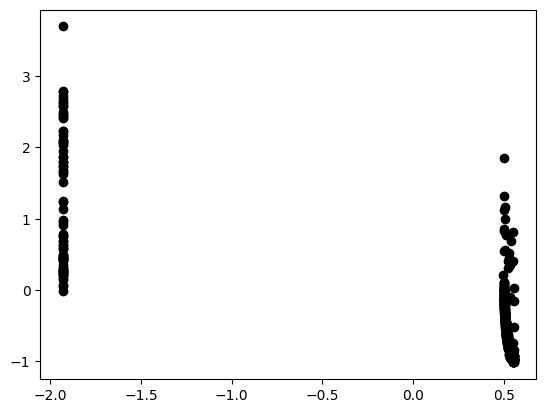

Min:  -1.9304041908181313 Max:  0.5537862831761075 Mean:  0.05635607161236904 Std:  0.9594087131324204


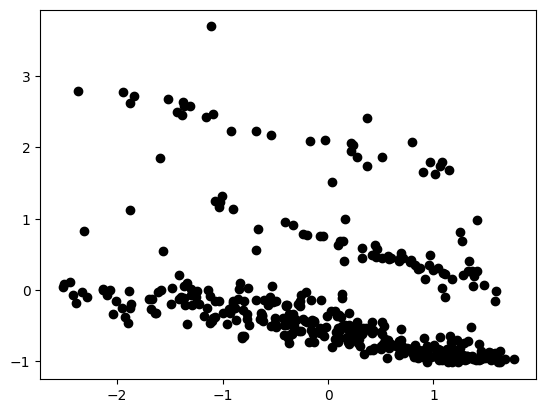

Min:  -2.5145286164061114 Max:  1.760139267247371 Mean:  0.06166744781226136 Std:  1.0367746826148434


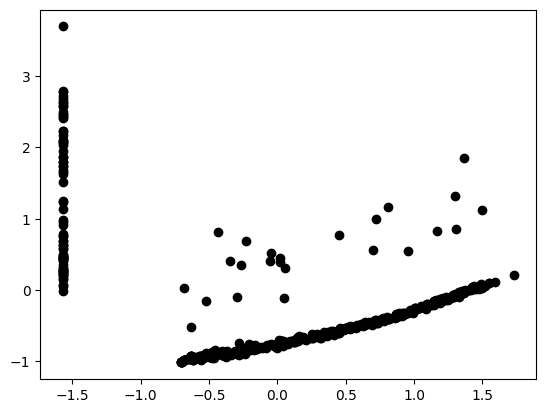

Min:  -1.5707288541148094 Max:  1.7294191687597353 Mean:  -0.0003813142682555871 Std:  0.9734431822462968


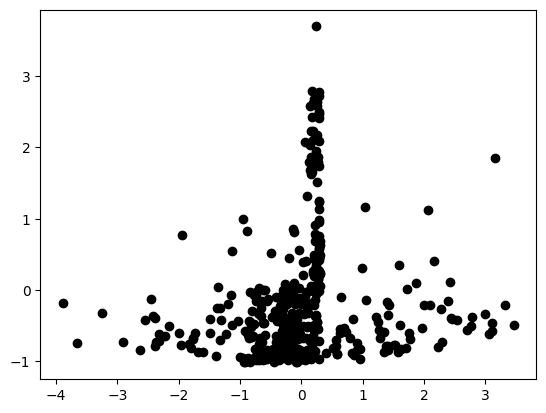

Min:  -3.89038469088198 Max:  3.4598771884781923 Mean:  -0.0006738225689768275 Std:  1.0382859022527482


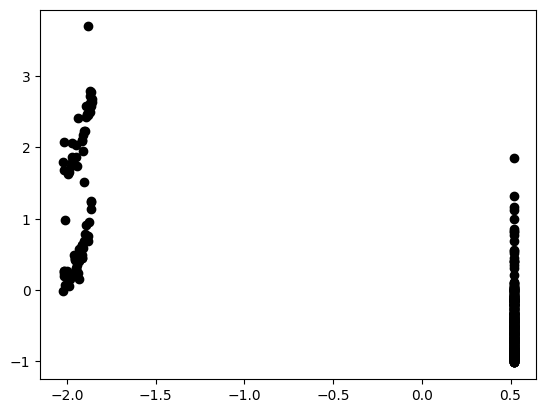

Min:  -2.0231870103912257 Max:  0.5178403793990417 Mean:  0.05469957982647933 Std:  0.9594469217865705


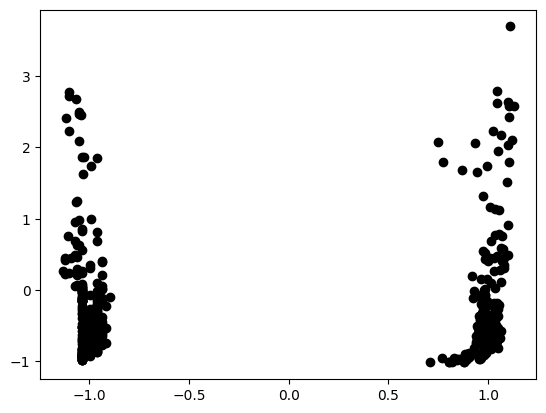

Min:  -1.13387101348303 Max:  1.1280870492349677 Mean:  0.0011825909134430402 Std:  1.001699111704061


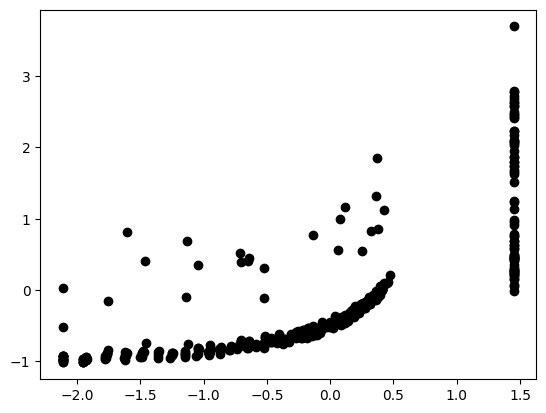

Min:  -2.112149405862517 Max:  1.4497655325422731 Mean:  -0.1014441235376912 Std:  1.0330734498680236


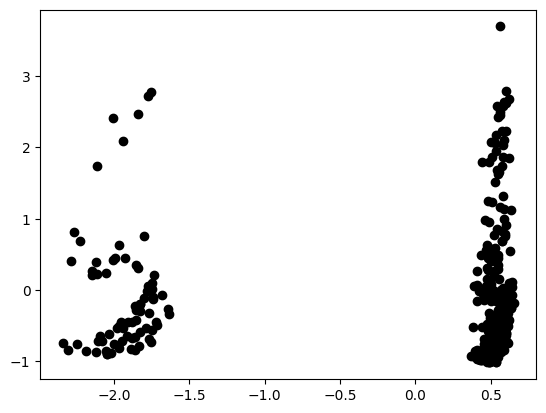

Min:  -2.3389015926858256 Max:  0.6533180866456505 Mean:  0.07744952137391481 Std:  0.9571538855272943


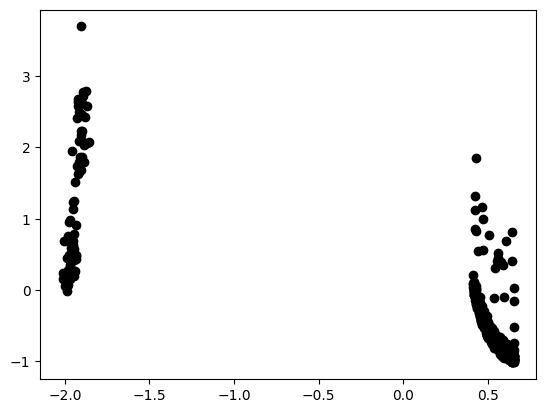

Min:  -2.0122066231496256 Max:  0.6531967928741557 Mean:  0.057816373627636135 Std:  0.9663104816840483


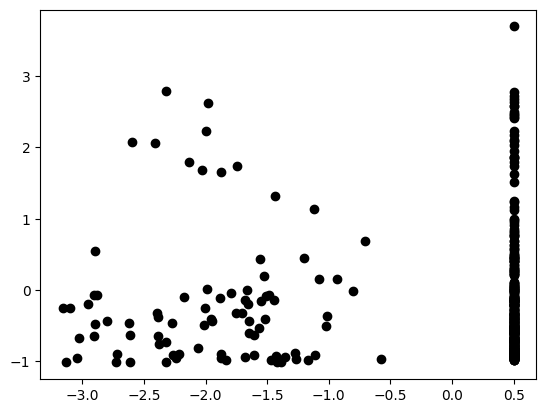

Min:  -3.1579031996083233 Max:  0.4992680446879562 Mean:  -0.026872708043192372 Std:  1.0424527555036471


In [10]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())